Step 1: Visual Analytics for df_2020
EDA with Complex Visualizations:
Use parallel coordinates plots to analyze the relationship between Avg_viewers, Avg_channels, and Avg_viewer_ratio.
Use a scatterplot matrix (SPLOM) for multivariate correlation analysis between numerical features like Hours_watched, Peak_viewers, Streamers, and Avg_viewers.
Analyze time-based trends:
Plot heatmaps or line charts to show trends in Hours_watched or Avg_viewers across months.
Code for EDA Visualizations

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
df_2020 = pd.read_csv("df_2020_preprocessed.csv")
streamer_data = pd.read_csv("twitchdata-update.csv")
# game_category_data = pd.read_csv("games.csv")

In [72]:
df_2020.shape

(2600, 15)

In [73]:
# game_category_data.head()

                 Genres  Hours_watched  Avg_viewers  Streamers
7             Not_found      21.812101     0.012832  30.317212
11                  RPG      10.542895     0.028130  18.906575
0             Adventure      10.210944     0.017576  22.184383
17             Strategy       9.656840     0.051246  17.087697
14              Shooter       8.260268     0.032696  21.644881
6                  MOBA       4.326634     0.327125   3.783698
15            Simulator       1.671421     0.010172   4.900050
5                 Indie       1.094976     0.006013   3.586731
19  Turn Based Strategy       0.892031     0.016519   0.406187
3     Card & Board Game       0.831134     0.051022   0.274914
2               Brawler       0.494874     0.007917   0.634458
18             Tactical       0.460232     0.022633   2.280912
8              Platform       0.456903     0.003916   1.261442
4              Fighting       0.297340     0.003774   0.798405
12               Racing       0.285276     0.006998   1

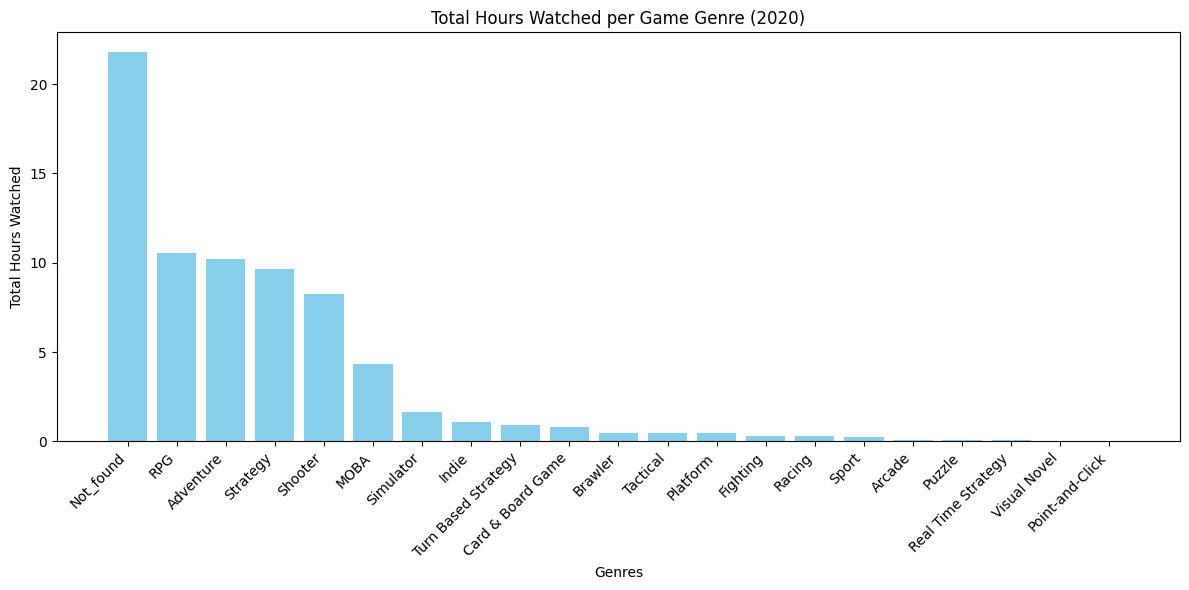

In [74]:
import pandas as pd
import numpy as np

# Load the game category data
game_category_data = pd.read_csv("games.csv")

# Clean and preprocess genres in game_category_data
game_category_data['Genres'] = game_category_data['Genres'].apply(
    lambda x: eval(x) if isinstance(x, str) else ['Not_found']
)
game_category_data['Genres'] = game_category_data['Genres'].apply(lambda x: x if len(x) > 0 else ['Not_found'])

# Create a mapping from game titles to genres
title_to_genre = game_category_data.set_index('Title')['Genres'].to_dict()

# Add a 'Genres' column to df_2020 based on game title
df_2020['Genres'] = df_2020['Game'].map(title_to_genre)

# Handle missing genres (games not found in game_category_data)
df_2020['Genres'] = df_2020['Genres'].apply(lambda x: x if isinstance(x, list) else ['Not_found'])

# Explode genres to analyze data at the individual genre level
df_genre_analysis = df_2020.explode('Genres')

# Aggregate data by genres
genre_stats = df_genre_analysis.groupby('Genres').agg({
    'Hours_watched': 'sum',
    'Avg_viewers': 'mean',
    'Streamers': 'sum'
}).reset_index()

# Sort data by total hours watched
genre_stats = genre_stats.sort_values('Hours_watched', ascending=False)

print(genre_stats)

# Visualization: Bar plot for total hours watched per genre
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genres'], genre_stats['Hours_watched'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Total Hours Watched per Game Genre (2020)')
plt.xlabel('Genres')
plt.ylabel('Total Hours Watched')
plt.tight_layout()
plt.show()


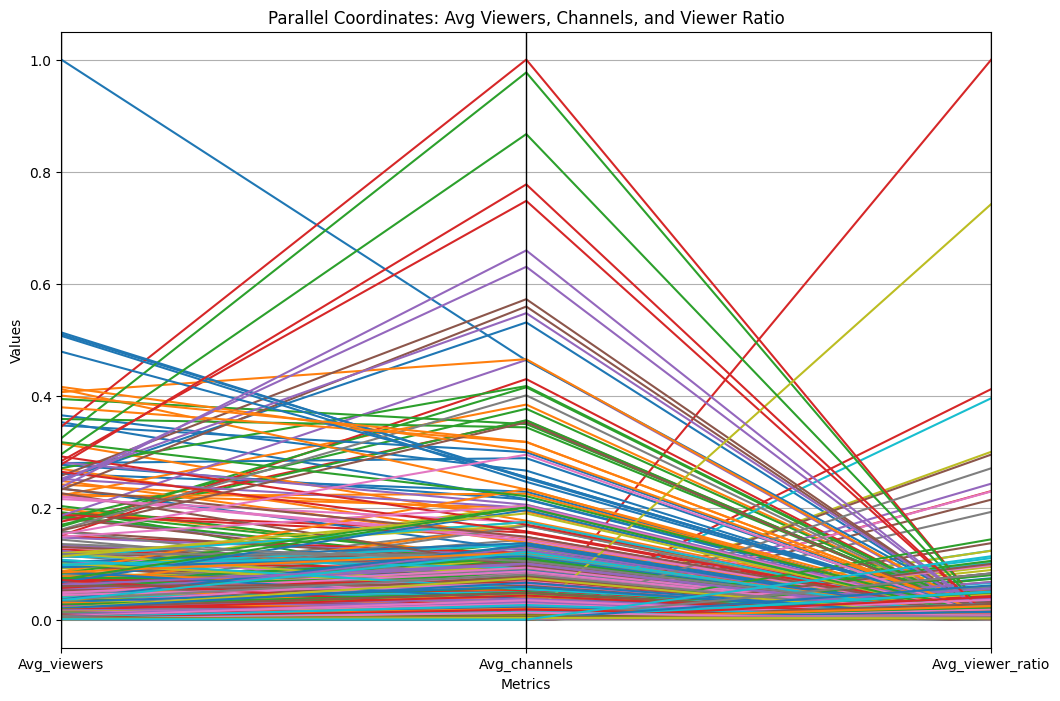

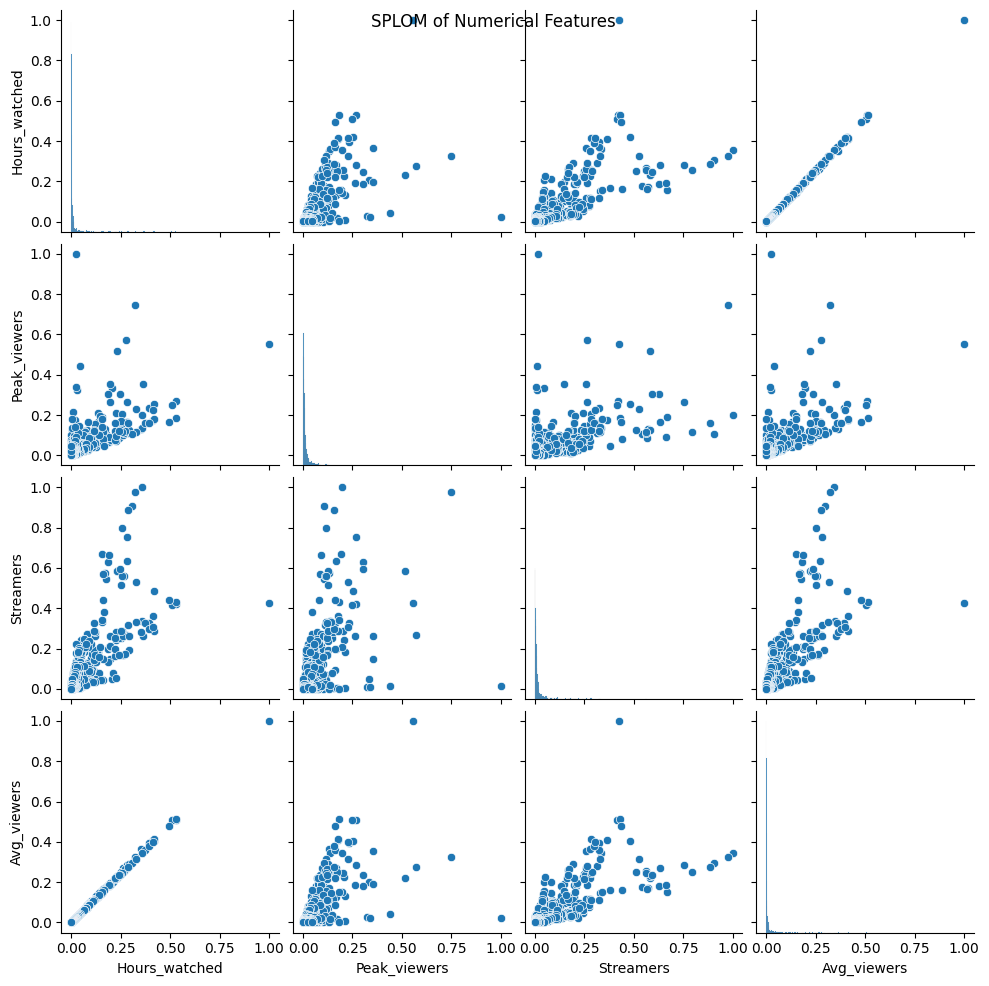

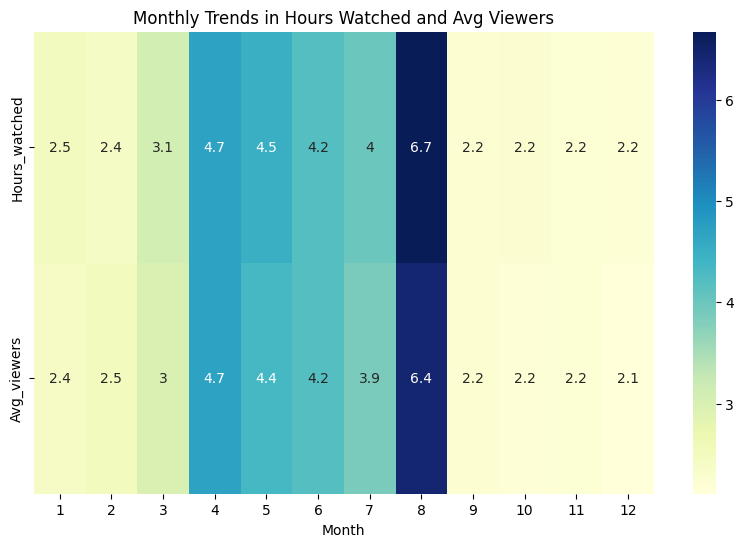

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np

# Parallel coordinates for key metrics

plt.figure(figsize=(12, 8))
parallel_coordinates(
    df_2020[['Rank', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']], 
    class_column='Rank',
    color=plt.cm.tab10.colors  # Optional: Customize line colors
)

# Remove the legend
plt.legend([], [], frameon=False)

# Add titles and labels
plt.title("Parallel Coordinates: Avg Viewers, Channels, and Viewer Ratio")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# SPLOM for correlations
sns.pairplot(df_2020[['Hours_watched', 'Peak_viewers', 'Streamers', 'Avg_viewers']])
plt.suptitle("SPLOM of Numerical Features")
plt.show()

# Time trend analysis
pivot_table = df_2020.groupby("Month").sum()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table[['Hours_watched', 'Avg_viewers']].T, cmap="YlGnBu", annot=True)
plt.title("Monthly Trends in Hours Watched and Avg Viewers")
plt.show()


In [76]:
streamer_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [106]:
df_2020.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date,Viewer_Streamer_Ratio,Hours_per_Channel,Genres
0,1,Fortnite,8,2019,0.257960,0.530654,0.114222,0.128373,0.795466,0.249606,0.530640,0.002183,1900-08-01,0.313787,2.009458,"[Adventure, RPG, Shooter, Strategy]"
1,2,League of Legends,8,2019,0.249368,0.193032,0.145545,0.045358,0.250431,0.241291,0.192980,0.006974,1900-08-01,0.963504,5.497720,"[MOBA, RPG, Strategy]"
2,3,Dota 2,8,2019,0.205196,0.047542,0.334717,0.010111,0.049466,0.198546,0.047502,0.024969,1900-08-01,4.013831,20.293750,[Not_found]
3,4,World of Warcraft,8,2019,0.196511,0.155585,0.353072,0.164768,0.148439,0.190141,0.155559,0.006808,1900-08-01,1.280937,1.192647,"[Adventure, RPG]"
4,5,Just Chatting,8,2019,0.188226,0.097859,0.064730,0.016959,0.207088,0.182123,0.097832,0.010740,1900-08-01,0.879445,11.099081,[Not_found]


In [77]:
# Convert 'Month' to datetime format using numeric months
df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%m')


Step 1: Add a Date Column to df_2020
The Month column contains numeric values (e.g., 1 for January), so we can convert it to a Date column:

python
Copy code


In [78]:
# Set custom year (e.g., 2020)
df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Month'], format='%m').dt.strftime('2020-%m-01')
df_2020['Date'] = pd.to_datetime(df_2020['Date'])  # Convert back to datetime object


In [79]:
df_2020.shape

(2600, 16)

Step 2: Merge df_2020 with Genre Information
Propagate the Date column to df_genre_analysis when grouping by Genres. Use the already-merged data (df_genre_analysis) for grouping and ensure it includes the Date column:

In [80]:
# # Merge genre data with df_2020, aligning 'Game' with 'Title'
# df_genre_analysis = pd.merge(
#     df_2020[['Game', 'Date', 'Hours_watched','Hours_streamed',
#        'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
#        'Avg_channels', 'Avg_viewer_ratio', 'Viewer_Streamer_Ratio',
#        'Hours_per_Channel',]],
#     game_category_data[['Title', 'Genres']],
#     left_on='Game',  # Use 'Game' from df_2020
#     right_on='Title',  # Use 'Title' from game_category_data
#     how='left'
# )

# # Drop the 'Title' column (if not needed after the merge)
# df_genre_analysis.drop(columns=['Title'], inplace=True)



In [81]:
# df_genre_analysis.shape

Step 3: Group Data for Visualization
Group the data by both Date and Genres for analysis:

python
Copy code


In [82]:
# # Explode the 'Genres' column so each genre has its own row
# df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(lambda x: x if isinstance(x, list) else ['Not_found'])
# df_genre_analysis = df_genre_analysis.explode('Genres')

# # Group by 'Date' and 'Genres' and sum the 'Hours_watched'
# df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()

# # Display the resulting DataFrame
# print(df_genre_time)




There were too many Not_found games, so we manually assigned those games genres. These mappings can be found in Not_found_games.csv

In [83]:
# import pandas as pd

# # Load data from CSV files
# # df_2020 = pd.read_csv('df_2020.csv')
# games_data = pd.read_csv('games.csv')  # Contains Title and Genres (list)
# not_found_games = pd.read_csv('Not_found_games.csv')  # Contains Game and Genre


# # Merge df_2020 with games.csv to add Genres
# df_genre_analysis = pd.merge(
#     df_2020[['Game', 'Date', 'Hours_watched', 'Hours_streamed', 'Peak_viewers', 
#              'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels', 
#              'Avg_viewer_ratio', 'Viewer_Streamer_Ratio', 'Hours_per_Channel']],
#     games_data[['Title', 'Genres']],
#     left_on='Game',
#     right_on='Title',
#     how='left'
# )

# # Drop the 'Title' column (not needed after merge)
# df_genre_analysis.drop(columns=['Title'], inplace=True)

# # Fill missing genres with 'Not_found'
# df_genre_analysis['Genres'] = df_genre_analysis['Genres'].fillna('Not_found')

# # Ensure Genres is always a list for processing
# df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(
#     lambda x: x if isinstance(x, list) else [x]
# )

# # Explode the Genres list to create one row per genre
# df_genre_analysis = df_genre_analysis.explode('Genres').reset_index(drop=True)

# # For games with 'Not_found' in Genres, update genres using Not_found_games.csv
# not_found_mapping = not_found_games.set_index('Game')['Genre'].to_dict()

# # Replace 'Not_found' genres with the mapping from Not_found_games.csv
# df_genre_analysis['Genres'] = df_genre_analysis.apply(
#     lambda row: not_found_mapping.get(row['Game'], row['Genres']) if row['Genres'] == 'Not_found' else row['Genres'],
#     axis=1
# )

# # Verify the dataframe
# print(df_genre_analysis.head())

In [84]:
import pandas as pd

# Load the data
# df_2020 = pd.read_csv('df_2020.csv')  # Main data file
game_category_data = pd.read_csv('games.csv')  # File containing game titles and genres
not_found_games = pd.read_csv('Not_found_games.csv')  # File for missing genre mappings

# Merge genre data with df_2020, aligning 'Game' with 'Title'
df_genre_analysis = pd.merge(
    df_2020[['Game', 'Date', 'Hours_watched', 'Hours_streamed', 'Peak_viewers',
             'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels',
             'Avg_viewer_ratio', 'Viewer_Streamer_Ratio', 'Hours_per_Channel']],
    game_category_data[['Title', 'Genres']],
    left_on='Game',  # Use 'Game' from df_2020
    right_on='Title',  # Use 'Title' from game_category_data
    how='left'
)

# Drop the 'Title' column (not needed after the merge)
df_genre_analysis.drop(columns=['Title'], inplace=True)

# Ensure 'Genres' is a list; fill missing values with 'Not_found'
df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(
    lambda x: x.split(', ') if isinstance(x, str) else ['Not_found']
)

# Handle 'Not_found' genres using the not_found_games mapping
not_found_mapping = not_found_games.set_index('Game')['Genre'].to_dict()
df_genre_analysis['Genres'] = df_genre_analysis.apply(
    lambda row: row['Genres'] if 'Not_found' not in row['Genres'] else 
    not_found_mapping.get(row['Game'], ['Not_found']),
    axis=1
)

# Explode 'Genres' so each genre has its own row
df_genre_analysis = df_genre_analysis.explode('Genres').reset_index(drop=True)

# **Clean up the 'Genres' column to remove unwanted characters**
df_genre_analysis['Genres'] = df_genre_analysis['Genres'].str.replace(r"[\[\]']", '', regex=True)

# Generate df_game_genres (Game-Genre mappings)
df_game_genres = (
    df_genre_analysis[['Game', 'Genres']]  # Select relevant columns
    .drop_duplicates()                     # Drop duplicate game-genre pairs
    .reset_index(drop=True)                # Reset index
)

# Optional: Filter out rows with 'Not_found' in 'Genres'
df_game_genres = df_game_genres[df_game_genres['Genres'] != 'Not_found']

# Verify the shape of df_game_genres
print(f"df_game_genres generated successfully with shape: {df_game_genres.shape}")

# Save the resulting DataFrame to a CSV file
output_file = "Games_and_Genres.csv"
df_game_genres.to_csv(output_file, index=False)
print(f"File saved to {output_file}")


df_game_genres generated successfully with shape: (762, 2)
File saved to Games_and_Genres.csv


In [85]:
# Filter df_genre_analysis for rows where the genre is 'Not_found'
not_found_games = df_genre_analysis[df_genre_analysis['Genres'] == 'Not_found']

# Check if there are any games with 'Not_found' in their genres
if not_found_games.empty:
    print("All games have been successfully mapped to valid genres.")
else:
    print("Games still mapped to 'Not_found':")
    print(not_found_games[['Game', 'Genres']])
    print(f"Count of games with 'Not_found': {not_found_games.shape[0]}")


Games still mapped to 'Not_found':
                                        Game     Genres
238                            Silver Chains  Not_found
247               Age of Wonders: Planetfall  Not_found
250                          Ring Of Elysium  Not_found
280                  Dragon Quest Builders 2  Not_found
281                      Rebel Galaxy Outlaw  Not_found
285                          SAMURAI SHODOWN  Not_found
286      Pok<U+00E9>mon Ultra Sun/Ultra Moon  Not_found
292                  Warhammer: Vermintide 2  Not_found
293                              60 Seconds!  Not_found
299         Pok<U+00E9>mon Trading Card Game  Not_found
346               BlazBlue: Cross Tag Battle  Not_found
395                              Hide Or Die  Not_found
407                           Gears of War 4  Not_found
417  Warhammer 40,000: Inquisitor - Prophecy  Not_found
425       Age of Empires: Definitive Edition  Not_found
Count of games with 'Not_found': 15


In [86]:
df_genre_analysis.shape

(5614, 13)

In [87]:
# df_genre_time.shape

In [88]:
df_genre_analysis.head()

,Game,Date,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Viewer_Streamer_Ratio,Hours_per_Channel,Genres
0,Fortnite,1900-08-01,0.257960,0.530654,0.114222,0.128373,0.795466,0.249606,0.53064,0.002183,0.313787,2.009458,Adventure
1,Fortnite,1900-08-01,0.257960,0.530654,0.114222,0.128373,0.795466,0.249606,0.53064,0.002183,0.313787,2.009458,RPG
2,Fortnite,1900-08-01,0.257960,0.530654,0.114222,0.128373,0.795466,0.249606,0.53064,0.002183,0.313787,2.009458,Shooter
3,Fortnite,1900-08-01,0.257960,0.530654,0.114222,0.128373,0.795466,0.249606,0.53064,0.002183,0.313787,2.009458,Strategy
4,League of Legends,1900-08-01,0.249368,0.193032,0.145545,0.045358,0.250431,0.241291,0.19298,0.006974,0.963504,5.497720,MOBA


Printing a few games per category

In [89]:
# # Merge genre data with df_2020, aligning 'Game' with 'Title'
# df_genre_analysis = pd.merge(
#     df_2020[['Game', 'Date', 'Hours_watched', 'Hours_streamed', 'Peak_viewers',
#              'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels',
#              'Avg_viewer_ratio', 'Viewer_Streamer_Ratio', 'Hours_per_Channel']],
#     game_category_data[['Title', 'Genres']],
#     left_on='Game',  # Use 'Game' from df_2020
#     right_on='Title',  # Use 'Title' from game_category_data
#     how='left'
# )

# # Drop the 'Title' column (not needed after the merge)
# df_genre_analysis.drop(columns=['Title'], inplace=True)

# # Ensure 'Genres' is a list; fill missing values with 'Not_found'
# df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(
#     lambda x: x if isinstance(x, list) else ['Not_found']
# )

# # Explode 'Genres' so each genre has its own row
# df_genre_analysis = df_genre_analysis.explode('Genres')

# # Generate df_game_genres
# df_game_genres = (
#     df_genre_analysis[['Game', 'Genres']]  # Select relevant columns
#     .drop_duplicates()                     # Drop duplicate game-genre pairs
#     .reset_index(drop=True)                # Reset index
# )

# # Optional: Filter out rows with 'Not_found' in 'Genres'
# df_game_genres = df_game_genres[df_game_genres['Genres'] != 'Not_found']

# # Verify the shape of df_game_genres
# print(f"df_game_genres generated successfully with shape: {df_game_genres.shape}")

# # Save the resulting DataFrame to a CSV file
# output_file = "Games_and_Genres.csv"
# df_game_genres.to_csv(output_file, index=False)
# print(f"File saved to {output_file}")



In [90]:
# # Ensure 'Genres' column is exploded so that each genre has its own row
# df_game_genres = df_genre_analysis[['Game', 'Genres']].drop_duplicates()

# # Save the resulting DataFrame to a CSV file
# output_file = "Games_and_Genres.csv"
# df_game_genres.to_csv(output_file, index=False)

# print(f"File saved successfully to {output_file}")


In [91]:
# df_game_genres.shape

In [92]:
# # Ensure 'Genres' is exploded and cleaned in df_genre_analysis
# df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(
#     lambda x: x if isinstance(x, list) else ['Not_found']
# )
# df_genre_analysis = df_genre_analysis.explode('Genres')

# # Select only 'Game' and 'Genres' columns to create df_game_genres
# # df_game_genres = df_genre_analysis[['Game', 'Genres']].drop_duplicates().reset_index(drop=True)

# # # Optional: Filter out rows where 'Genres' is 'Not_found' if such rows are not needed
# # df_game_genres = df_game_genres[df_game_genres['Genres'] != 'Not_found']

# # Verify the shape
# print(f"df_game_genres successfully generated with shape: {df_game_genres.shape}")

# # Save the resulting DataFrame to a CSV file
# output_file = "Games_and_Genres.csv"
# df_game_genres.to_csv(output_file, index=False)
# print(f"File saved to {output_file}")


In [93]:
# # Inspect the first few rows of the 'Month' column
# print(df_2020['Month'].head())

# # Convert 'Month' to a proper datetime
# # If 'Month' is in numerical format (e.g., 1, 2, ..., 12):
# df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%m')  # Numeric months to datetime

# # If 'Month' contains abbreviations (e.g., "Jan", "Feb"):
# # df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%b')

# # If 'Month' contains full month names (e.g., "January", "February"):
# # df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%B')

# # Proceed with grouping and plotting
# df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()


In [94]:
# # Assuming 'Month' contains numeric values like 1 for January, 2 for February, etc.
# df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%m', errors='coerce')

# # Now you can proceed with your grouping and analysis
# df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()



1. Stacked Bar Chart: Contribution of different genres to total hours watched over time
This will help us understand how certain genres dominate or change over time.

python
Copy code


Step 2: Create df_genre_time for Plotting

In [95]:
# Convert Date to datetime format and extract the month
df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Date'], format='%Y-%m-%d')
df_genre_analysis['Month'] = df_genre_analysis['Date'].dt.month

# Group by Month and Genres to aggregate Hours_watched
df_genre_time = df_genre_analysis.groupby(['Month', 'Genres'])['Hours_watched'].sum().reset_index()



Genres  Adventure    Arcade   Brawler  Card & Board Game  Fighting     Indie  \
Month                                                                          
1        1.202102  0.007309  0.084362           0.089648  0.084022  0.125364   
2        1.040559  0.006390  0.020555           0.084552  0.057114  0.159744   
3        1.320885  0.003894  0.076257           0.099438  0.041983  0.171342   
4        2.194810  0.007800  0.036499           0.126299  0.038305  0.138387   
5        2.300826  0.009680  0.054706           0.112532  0.052207  0.183079   

Genres      MOBA  Not_found     Other  Platform  ...       RPG    Racing  \
Month                                            ...                       
1       0.724400        0.0  0.373855  0.093501  ...  1.129079  0.055974   
2       0.827893        0.0  0.370400  0.075532  ...  1.150014  0.078525   
3       0.854143        0.0  0.473558  0.072777  ...  1.228900  0.100827   
4       0.966003        0.0  0.617411  0.068601  ...  1.654

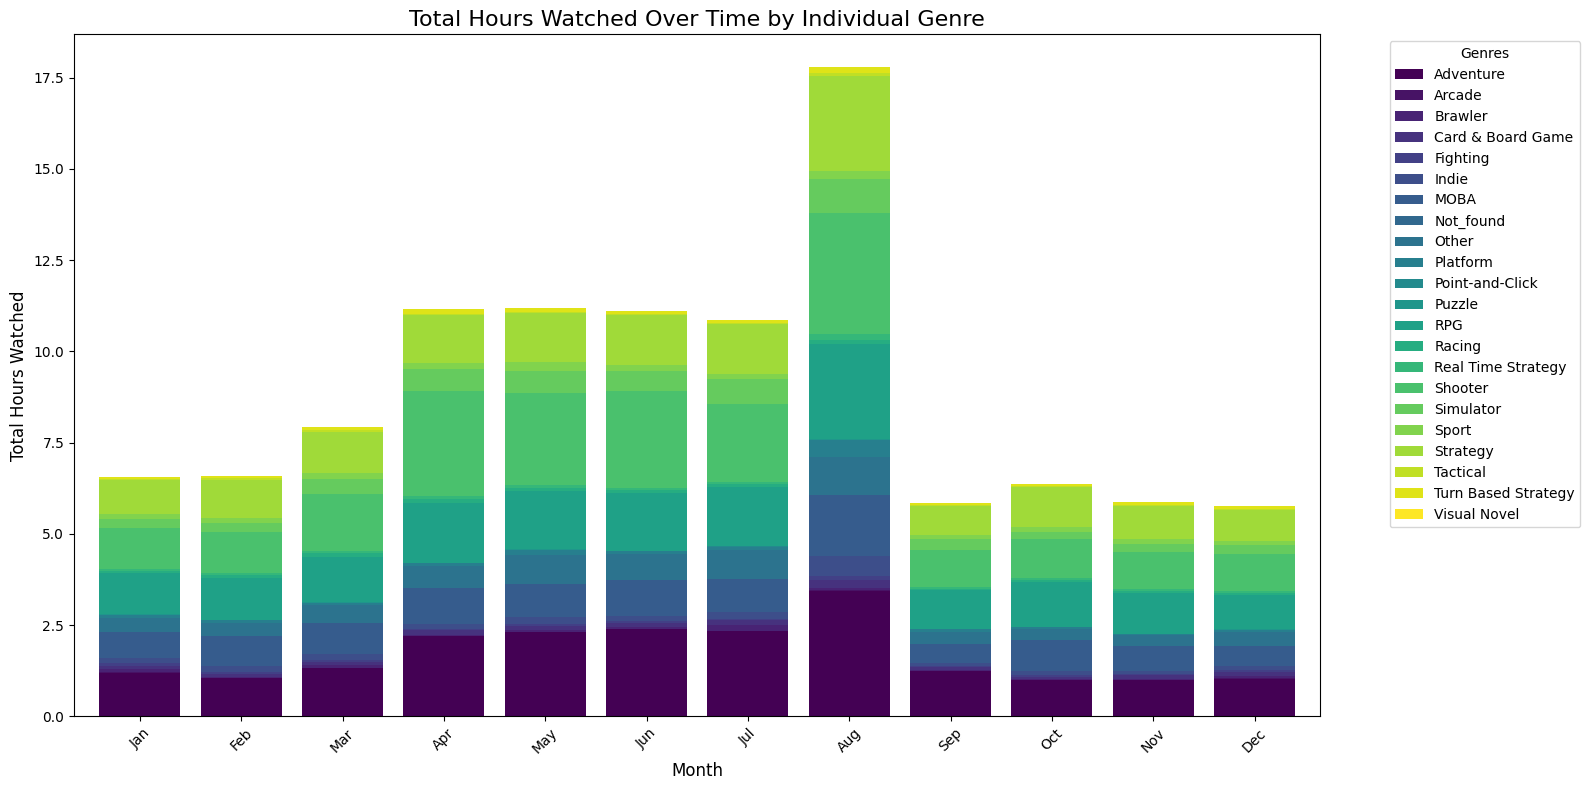

In [96]:
import matplotlib.pyplot as plt

# Pivot for stacked bar chart
genre_time_pivot = df_genre_time.pivot(index='Month', columns='Genres', values='Hours_watched').fillna(0)

# Debugging: Print the pivot table to verify data
print(genre_time_pivot.head())

# Create the stacked bar chart
genre_time_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8),
    cmap='viridis',
    width=0.8
)
plt.title('Total Hours Watched Over Time by Individual Genre', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Watched', fontsize=12)
plt.xticks(
    ticks=range(len(genre_time_pivot.index)),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=45
)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [97]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming we have a "Date" column in df_2020 (if not, add it based on your time granularity)
# df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%m')  # Example for Month-based data
# df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()

# # Pivot for stacked bar chart
# genre_time_pivot = df_genre_time.pivot(index='Date', columns='Genres', values='Hours_watched').fillna(0)

# # Stacked bar chart
# genre_time_pivot.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(16, 8),
#     cmap='viridis',
#     width=0.8
# )
# plt.title('Total Hours Watched Over Time by Genre', fontsize=16)
# plt.xlabel('Time', fontsize=12)
# plt.ylabel('Total Hours Watched', fontsize=12)
# plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [98]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df_2020['Genres'] is a list of genres for each game, we need to flatten it to strings
# df_2020['Genres'] = df_2020['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# # Create a 'Month' column to use on x-axis
# df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%m')  # Adjust based on your data format
# df_2020['Month'] = df_2020['Date'].dt.month

# # Summarize data by Month and Genre
# df_genre_time = df_2020.groupby(['Month', 'Genres'])['Hours_watched'].sum().reset_index()

# # Pivot for stacked bar chart
# genre_time_pivot = df_genre_time.pivot(index='Month', columns='Genres', values='Hours_watched').fillna(0)

# # Stacked bar chart
# genre_time_pivot.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(16, 8),
#     cmap='viridis',
#     width=0.8
# )
# plt.title('Total Hours Watched Over Time by Genre', fontsize=16)
# plt.xlabel('Month', fontsize=12)
# plt.ylabel('Total Hours Watched', fontsize=12)
# plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
# plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



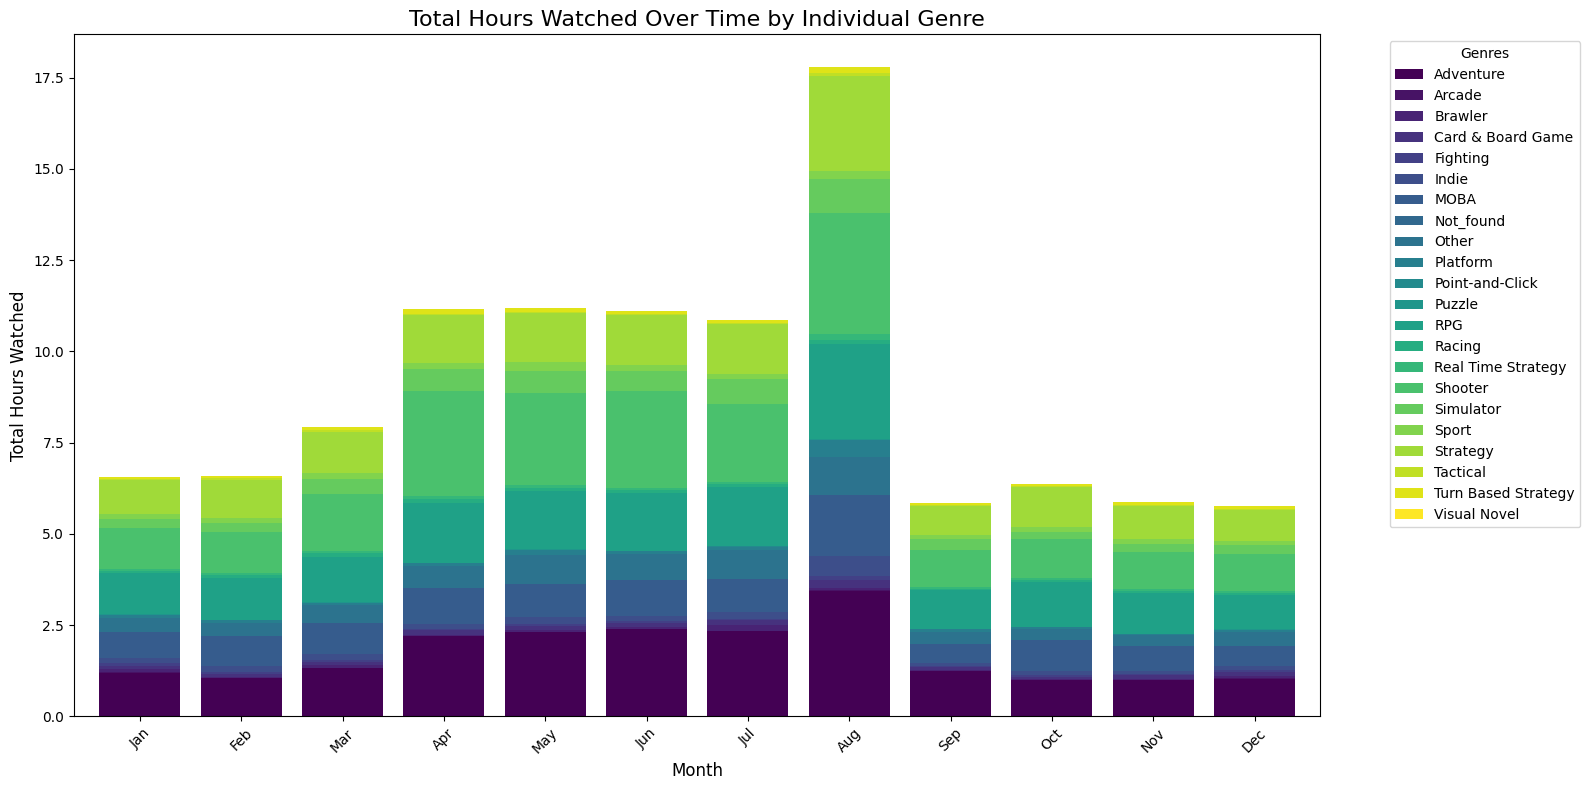

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Explode the Genres column to split genres into separate rows
df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df_genre_analysis = df_genre_analysis.explode('Genres')

# Create a 'Month' column for grouping
df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Date'], format='%Y-%m-%d')  # Adjust date format if needed
df_genre_analysis['Month'] = df_genre_analysis['Date'].dt.month

# Summarize data by Month and Genre
df_genre_time = df_genre_analysis.groupby(['Month', 'Genres'])['Hours_watched'].sum().reset_index()

# Pivot for stacked bar chart
genre_time_pivot = df_genre_time.pivot(index='Month', columns='Genres', values='Hours_watched').fillna(0)

# Stacked bar chart
genre_time_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8),
    cmap='viridis',
    width=0.8
)
plt.title('Total Hours Watched Over Time by Individual Genre', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Watched', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2. Heatmap: Viewer count across genres and streamers
A heatmap can show which genres have higher viewer engagement across the top streamers.

In [100]:
print(df_2020.columns)
print(df_genre_analysis.columns)


Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio', 'Date', 'Viewer_Streamer_Ratio',
       'Hours_per_Channel', 'Genres'],
      dtype='object')
Index(['Game', 'Date', 'Hours_watched', 'Hours_streamed', 'Peak_viewers',
       'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels',
       'Avg_viewer_ratio', 'Viewer_Streamer_Ratio', 'Hours_per_Channel',
       'Genres', 'Month'],
      dtype='object')


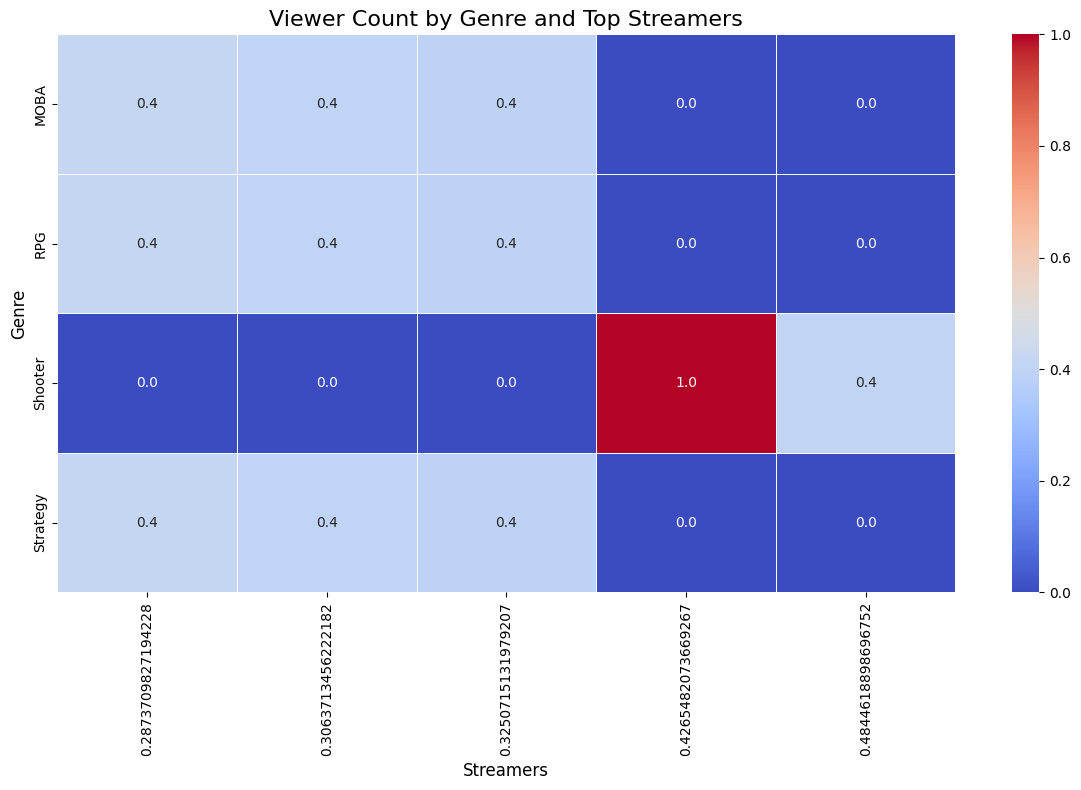

In [101]:
# Filter for top genres and streamers for better visualization
top_genres = genre_stats['Genres'].head(10)  # Top 10 genres
top_streamers = df_2020.groupby('Streamers')['Avg_viewers'].mean().nlargest(10).index  # Top 10 streamers

# Subset data for the heatmap
heatmap_data = df_genre_analysis[
    (df_genre_analysis['Genres'].isin(top_genres)) &
    (df_genre_analysis['Streamers'].isin(top_streamers))
]
heatmap_pivot = heatmap_data.pivot_table(
    index='Genres', columns='Streamers', values='Avg_viewers', aggfunc='mean'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title('Viewer Count by Genre and Top Streamers', fontsize=16)
plt.xlabel('Streamers', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()


3. Bubble Chart: Relationship between average viewers, streamers, and hours watched
A bubble chart can simultaneously display the popularity (hours watched), engagement (average viewers), and activity level (streamers).

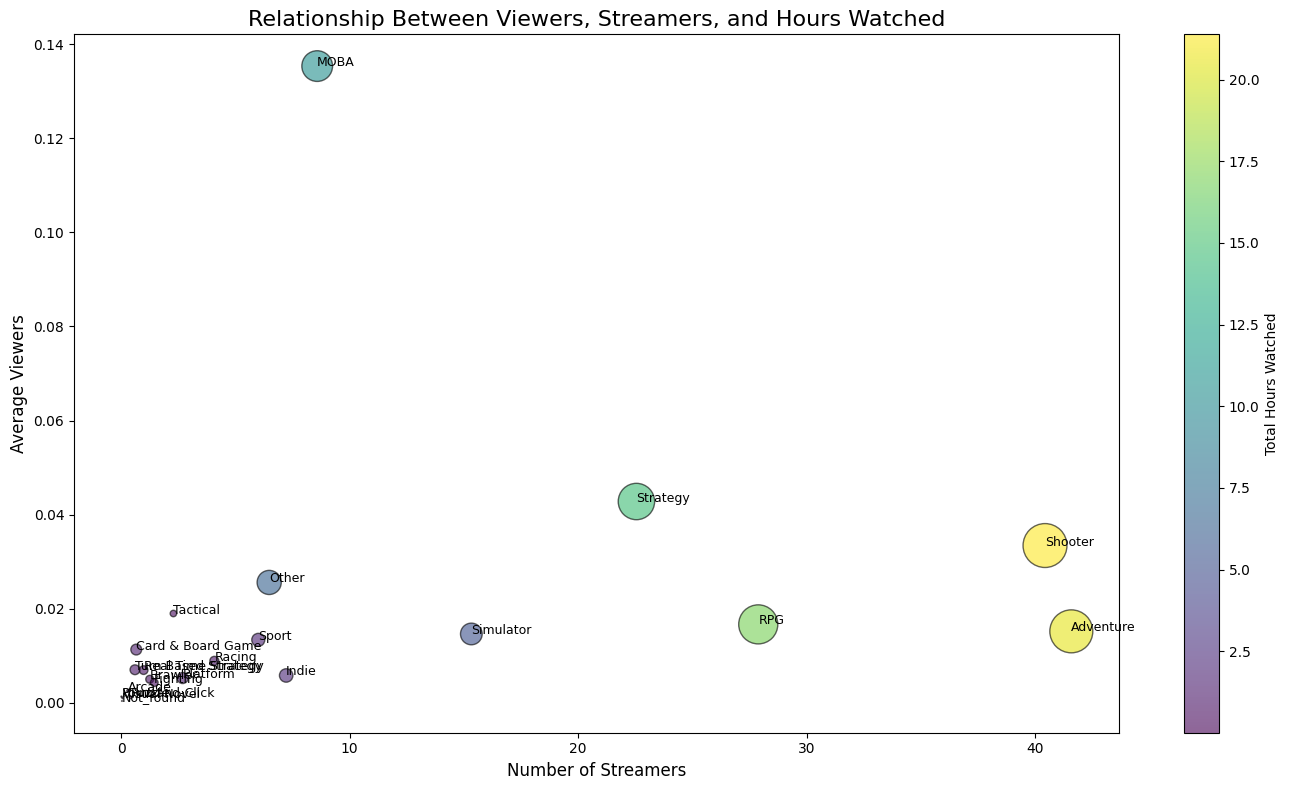

In [102]:
# Aggregation for bubble chart
bubble_data = df_genre_analysis.groupby('Genres').agg({
    'Avg_viewers': 'mean',
    'Streamers': 'sum',
    'Hours_watched': 'sum'
}).reset_index()

# Normalize bubble size for better visualization
bubble_data['Bubble_size'] = bubble_data['Hours_watched'] / bubble_data['Hours_watched'].max() * 1000

# Plot bubble chart
plt.figure(figsize=(14, 8))
plt.scatter(
    bubble_data['Streamers'], bubble_data['Avg_viewers'],
    s=bubble_data['Bubble_size'], alpha=0.6, c=bubble_data['Hours_watched'], cmap='viridis', edgecolor='k'
)
plt.colorbar(label='Total Hours Watched')
plt.title('Relationship Between Viewers, Streamers, and Hours Watched', fontsize=16)
plt.xlabel('Number of Streamers', fontsize=12)
plt.ylabel('Average Viewers', fontsize=12)

# Annotate with genres
for i, row in bubble_data.iterrows():
    plt.text(row['Streamers'], row['Avg_viewers'], row['Genres'], fontsize=9)

plt.tight_layout()
plt.show()


4. Treemap: Genre popularity based on total hours watched
Treemaps give a proportional representation of popularity across genres.

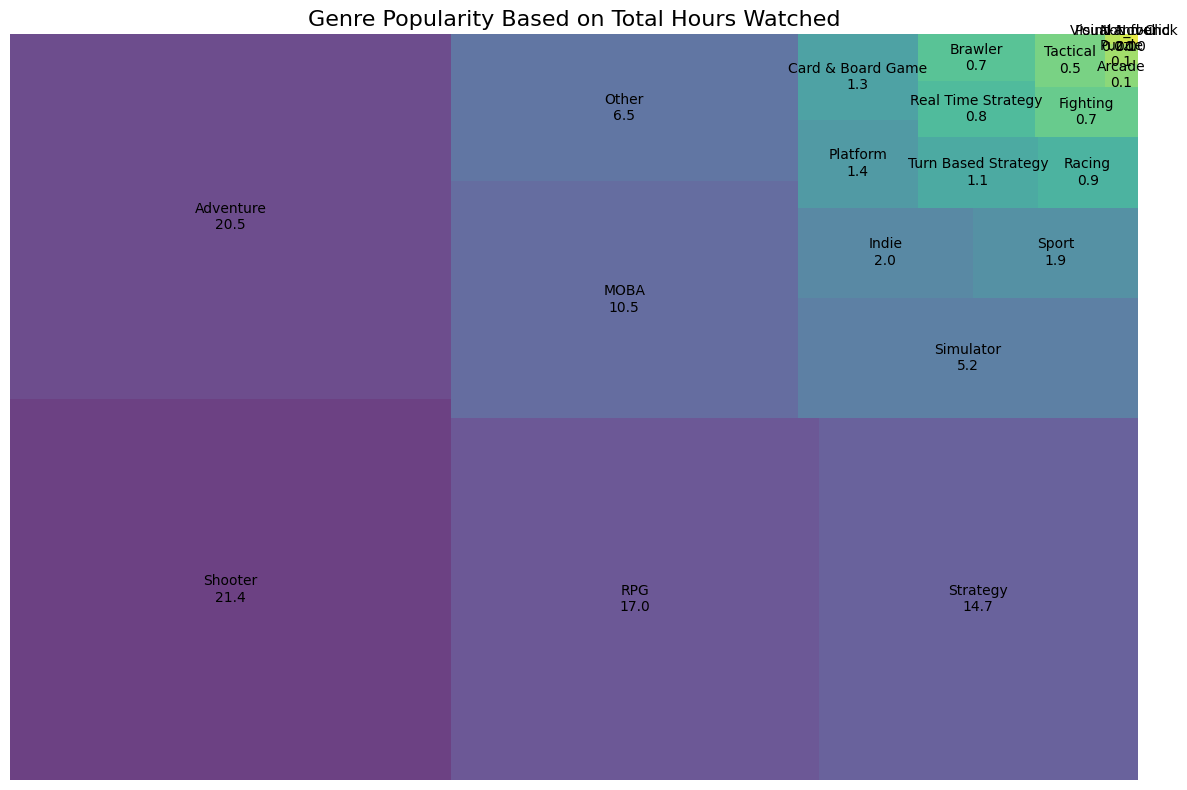

In [103]:
import squarify

# Treemap data
treemap_data = bubble_data.sort_values('Hours_watched', ascending=False)
sizes = treemap_data['Hours_watched']
labels = [f"{row['Genres']}\n{row['Hours_watched']:.1f}" for _, row in treemap_data.iterrows()]

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("viridis", len(treemap_data)))
plt.axis('off')
plt.title('Genre Popularity Based on Total Hours Watched', fontsize=16)
plt.tight_layout()
plt.show()


5. Pairplot: Exploring relationships between Twitch metrics across genres
A pairplot allows you to explore pairwise relationships in the data.

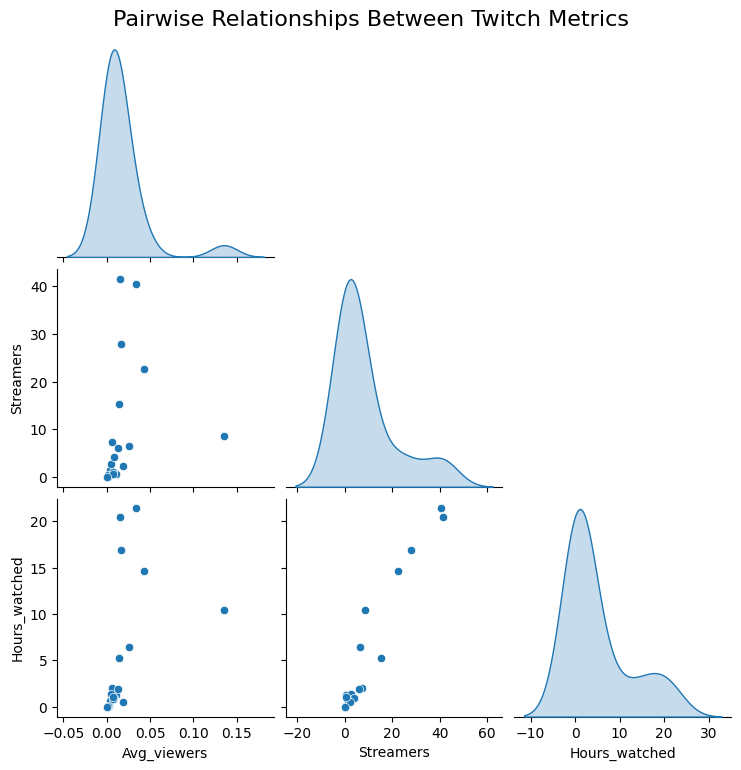

In [104]:
# Select numerical columns for pairplot
pairplot_data = bubble_data[['Avg_viewers', 'Streamers', 'Hours_watched']]

# Pairplot
sns.pairplot(pairplot_data, diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Twitch Metrics', y=1.02, fontsize=16)
plt.show()


1. Composite Visualizations
Composite visualizations combine multiple types of charts into a single view. Here are some ideas:

a) Integrated View: Heatmap + Bar Chart
Create an integrated view of:

Heatmap for average viewers by genre and streamer.
Bar chart overlay showing the total viewers for each genre.

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar data
bar_data = df_2020.groupby('Genres')['Avg_viewers'].sum().sort_values(ascending=False)

# Heatmap data
heatmap_data = heatmap_pivot

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, ax=ax1, cbar=False)

# Bar chart
bar_data.plot(kind='bar', color='lightblue', alpha=0.7, ax=ax2)
ax2.set_ylabel('Total Viewers (Bar Chart)', fontsize=12)

# Title and labels
plt.title('Integrated View: Avg Viewers Heatmap + Total Viewers Bar Chart', fontsize=16)
ax1.set_xlabel('Streamers', fontsize=12)
ax1.set_ylabel('Genre', fontsize=12)

plt.tight_layout()
plt.show()


TypeError: unhashable type: 'list'

b) Superimposed View: Line + Area Chart
Visualize the time series data (e.g., hours watched) as a line chart superimposed over an area chart.



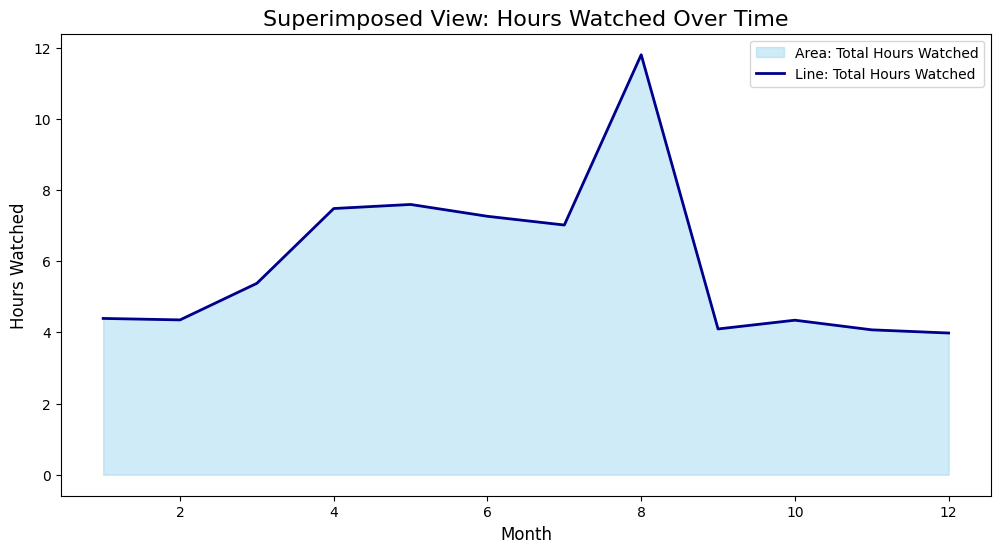

In [ ]:
# Aggregate month-wise data
month_data = df_2020.groupby('Month')['Hours_watched'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.fill_between(month_data.index, month_data, color='skyblue', alpha=0.4, label='Area: Total Hours Watched')
plt.plot(month_data.index, month_data, color='darkblue', label='Line: Total Hours Watched', linewidth=2)

plt.title('Superimposed View: Hours Watched Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hours Watched', fontsize=12)
plt.legend()
plt.show()


2. Time Series Visualization
A time series visualization can show monthly trends.

Example: Stacked Line Chart by Genre
python
Copy code


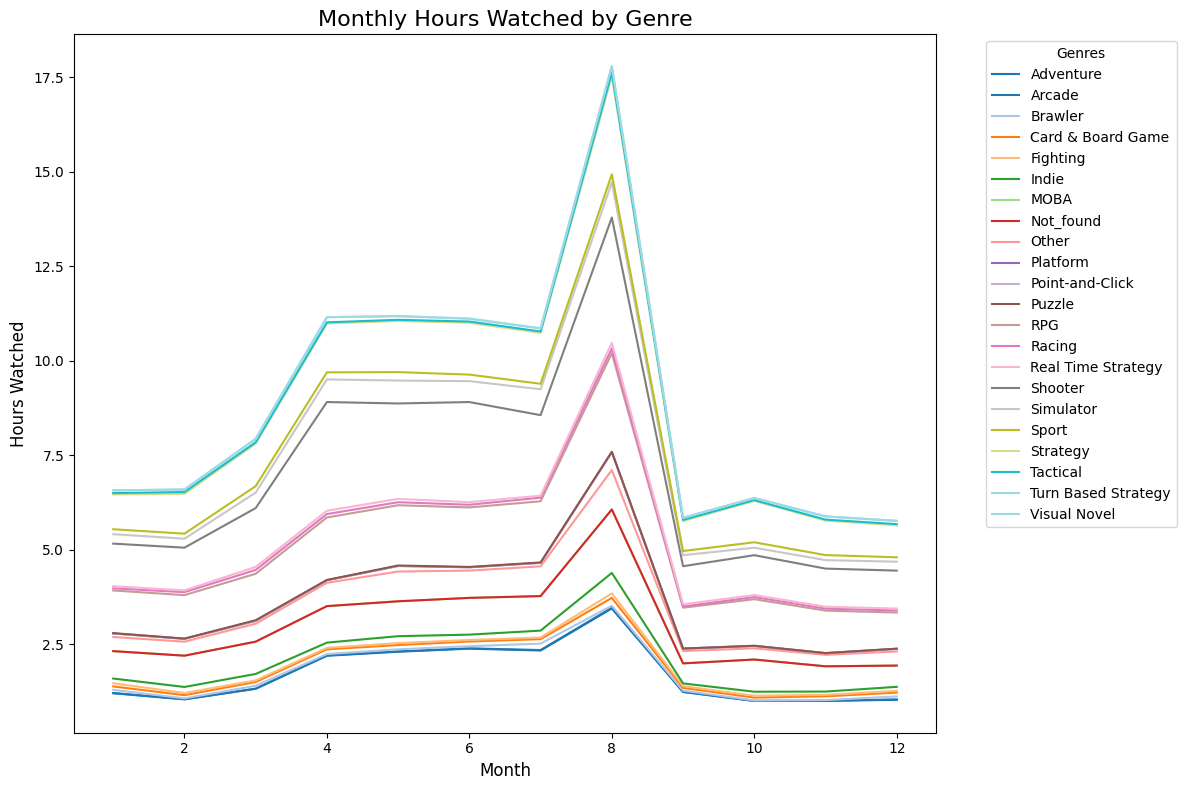

In [ ]:
# Aggregate month-wise and genre-wise data
genre_time_data = df_genre_analysis.groupby(['Month', 'Genres'])['Hours_watched'].sum().unstack().fillna(0)

# Plot stacked line chart
genre_time_data.plot(kind='line', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Monthly Hours Watched by Genre', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hours Watched', fontsize=12)
plt.legend(title='Genres', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()


3. Set Visualizations
Set visualizations help visualize intersections and unions of categorical data (e.g., streamers who play multiple genres).

a) UpSet Plot
Use an UpSet plot to show the overlap between genres watched by top streamers.

Code:

In [ ]:
# from upsetplot import UpSet
# import pandas as pd
# import matplotlib.pyplot as plt

# # Example genre-streamer overlap data
# genre_streamer_overlap = df_2020.groupby(['Streamers', 'Genres']).size().unstack(fill_value=0)
# genre_streamer_overlap_binary = genre_streamer_overlap > 0

# # Convert to a multi-index Series
# multi_index_series = genre_streamer_overlap_binary.stack()

# # Generate UpSet plot
# upset = UpSet(multi_index_series, subset_size='count', show_counts=True)
# upset.plot()
# plt.title('Genre Overlap Among Streamers', fontsize=16)
# plt.show()



In [ ]:
# from matplotlib_venn import venn3

# # Example genre sets
# adventure_viewers = set(df_2020[df_2020['Genres'] == 'Adventure']['Streamers'])
# shooter_viewers = set(df_2020[df_2020['Genres'] == 'Shooter']['Streamers'])
# strategy_viewers = set(df_2020[df_2020['Genres'] == 'Strategy']['Streamers'])

# # Venn Diagram
# venn3([adventure_viewers, shooter_viewers, strategy_viewers], ('Adventure', 'Shooter', 'Strategy'))
# plt.title('Genre Overlap Among Streamers', fontsize=16)
# plt.show()


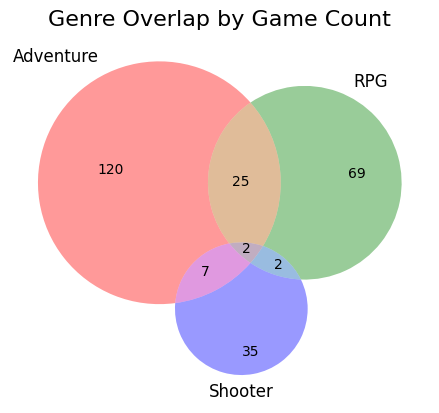

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Example genre sets (based on games)
adventure_games = set(df_genre_analysis[df_genre_analysis['Genres'] == 'Adventure']['Game'])
shooter_games = set(df_genre_analysis[df_genre_analysis['Genres'] == 'Shooter']['Game'])
strategy_games = set(df_genre_analysis[df_genre_analysis['Genres'] == 'Strategy']['Game'])

# Plot Venn Diagram
venn3([adventure_games, shooter_games, strategy_games], ('Adventure', 'RPG', 'Shooter'))
plt.title('Genre Overlap by Game Count: Top 3 Genres', fontsize=16)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

<Figure size 1200x800 with 0 Axes>

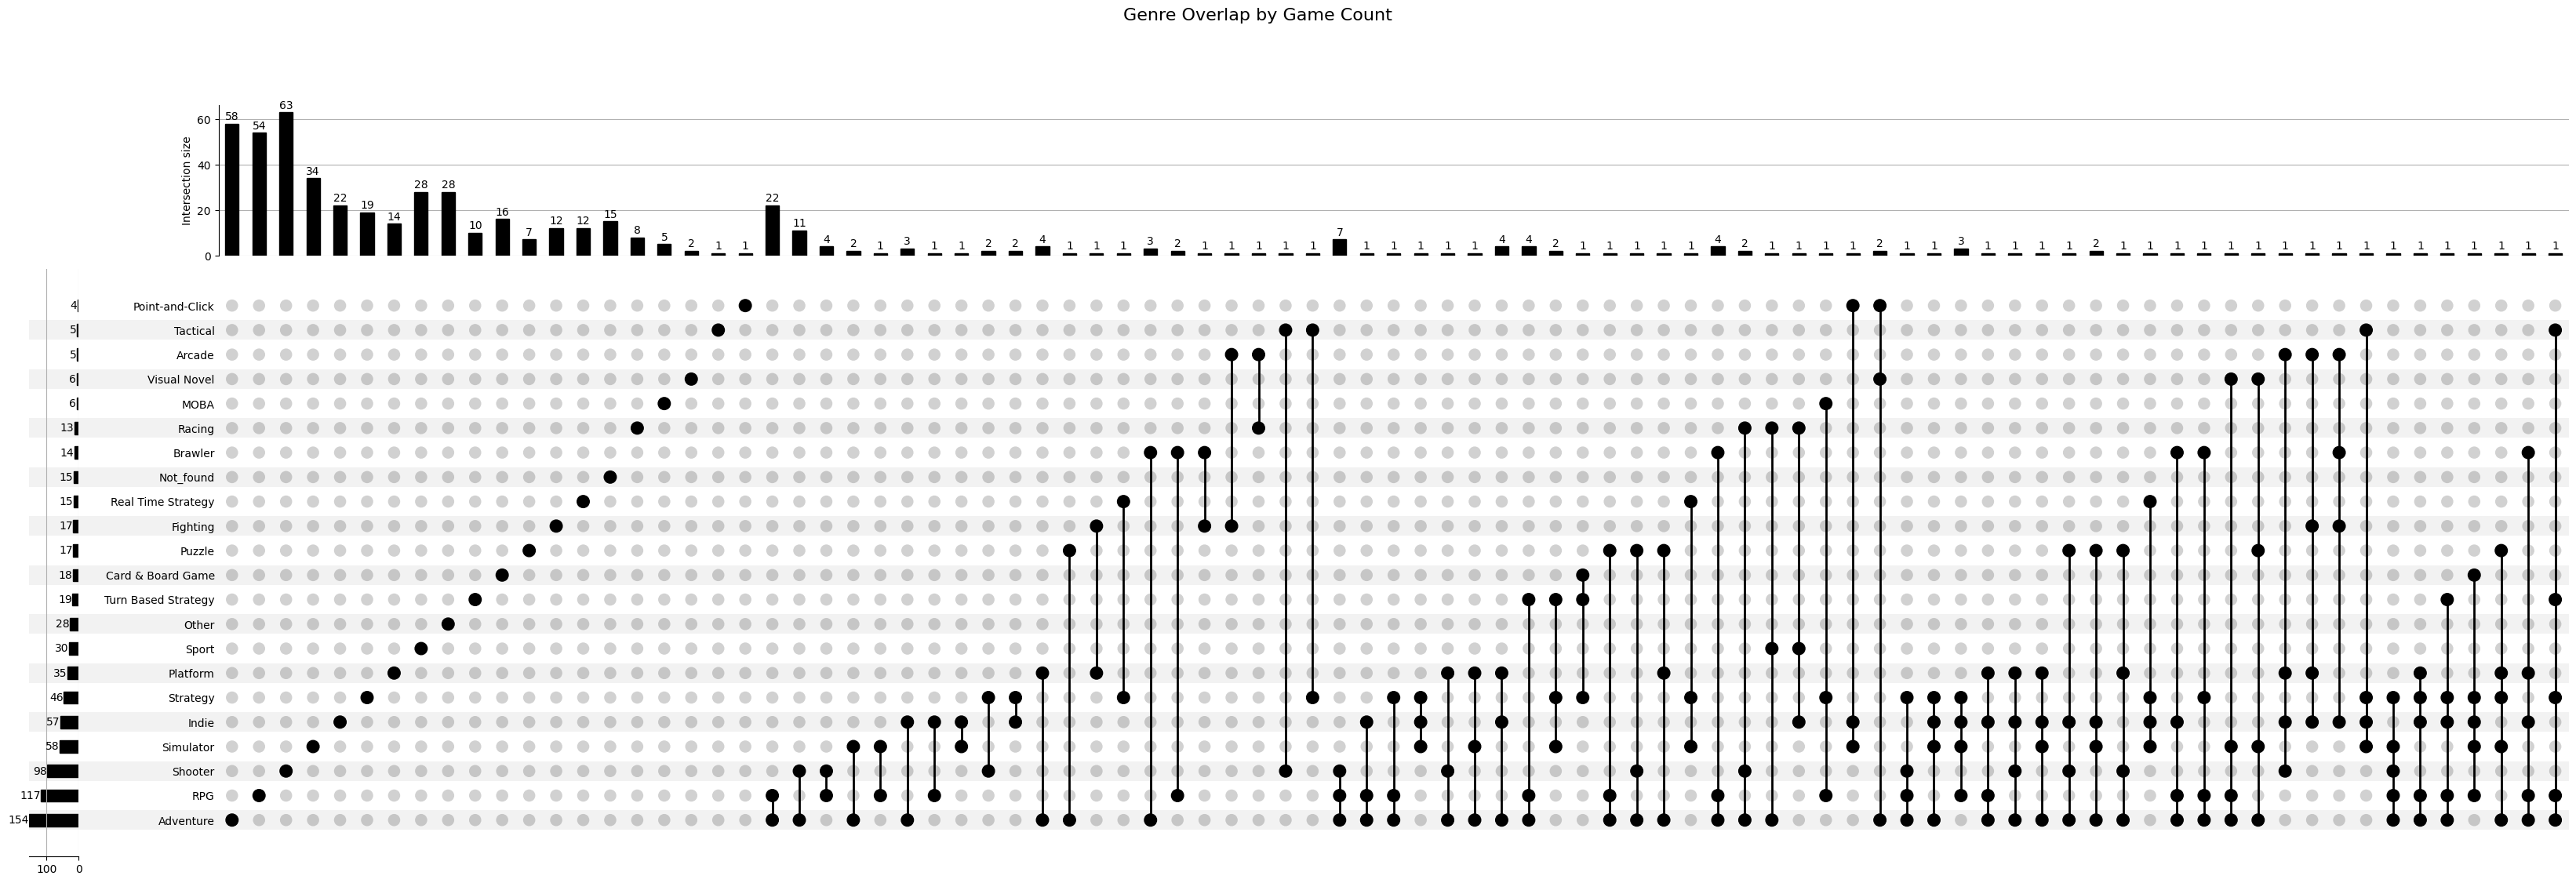

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Prepare data for genre overlap
genre_game_mapping = df_genre_analysis[['Game', 'Genres']]  # Ensure the dataset contains 'Game' and 'Genres'
genre_game_mapping = genre_game_mapping.drop_duplicates()  # Remove duplicate rows for games and genres

# Create a list of memberships (e.g., genres associated with each game)
membership_list = genre_game_mapping.groupby('Game')['Genres'].apply(list)

# Step 2: Create a membership dictionary for the UpSet plot
memberships = []
for genres in membership_list:
    memberships.append(tuple(genres))

# Convert to a format suitable for UpSet plotting
upset_data = from_memberships(memberships)

# Step 3: Plot the UpSet plot
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.suptitle('Genre Overlap by Game Count', fontsize=16)
plt.show()


Add Avg Watchtime Per Viewer in a Year

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from upsetplot import UpSet, from_memberships

# # Step 1: Create 'Avg Watchtime per Viewer (Year)' column
# df_streamers['Avg_watchtime_per_viewer_year'] = df_streamers['Watch time(Minutes)'] / df_streamers['Average viewers']

# # Step 2: Prepare data for UpSet Plot
# genre_game_mapping = df_2020[['Game', 'Genres']]  # Ensure the dataset contains 'Game' and 'Genres'
# genre_game_mapping = genre_game_mapping.drop_duplicates()  # Remove duplicate rows for games and genres

# # Create a list of memberships (e.g., genres associated with each game)
# membership_list = genre_game_mapping.groupby('Game')['Genres'].apply(list)

# # Step 3: Create a membership dictionary for the UpSet plot
# memberships = []
# for genres in membership_list:
#     memberships.append(tuple(genres))

# # Convert to a format suitable for UpSet plotting
# upset_data = from_memberships(memberships)

# # Step 4: Plot the UpSet plot
# plt.figure(figsize=(12, 8))
# upset = UpSet(upset_data, subset_size='count', show_counts=True)
# upset.plot()
# plt.suptitle('Genre Overlap by Game Count', fontsize=16)

# # Display Average Watchtime (extra visualization)
# plt.figure(figsize=(12, 6))
# df_streamers_sorted = df_streamers.sort_values(by='Avg_watchtime_per_viewer_year', ascending=False)
# plt.barh(df_streamers_sorted['Channel'][:10], df_streamers_sorted['Avg_watchtime_per_viewer_year'][:10], color='skyblue')
# plt.xlabel('Avg Watchtime Per Viewer (Minutes/Year)', fontsize=12)
# plt.ylabel('Streamer Channel', fontsize=12)
# plt.title('Top 10 Streamers by Avg Watchtime Per Viewer (Year)', fontsize=16)
# plt.tight_layout()
# plt.show()


NameError: name 'df_streamers' is not defined

In [ ]:
# Check for duplicate column names
print(df_genre_analysis.columns[df_genre_analysis.columns.duplicated()])


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df_genre_analysis is already loaded in your environment

# # Step 1: Reset the index (to avoid any issues with duplicates or indexing)
# df_genre_analysis = df_genre_analysis.reset_index(drop=True)

# # Step 2: Check for missing or NaN values, and handle them
# # Option 1: Remove rows with NaN values
# df_genre_analysis = df_genre_analysis.dropna()

# # Option 2: Fill NaN values with a placeholder (e.g., zero or mean/median)
# # df_genre_analysis.fillna(0, inplace=True)

# # Step 3: Ensure that the 'Genres' column is categorical (if using it as hue)
# df_genre_analysis['Genres'] = df_genre_analysis['Genres'].astype('category')

# # Step 4: Generate the GPLOM plot
# g = sns.pairplot(df_genre_analysis, 
#                  hue='Genres',               # Color by game genre
#                  palette='Set2',              # Use a distinct color palette for genres
#                  markers=["o", "s", "D", "X"], # Different markers for each genre
#                  diag_kind="kde",             # Use KDE plots along the diagonal
#                  plot_kws={'alpha': 0.6},     # Set transparency for scatter plot points
#                  height=2.5)                  # Size of each subplot

# # Set plot title
# plt.suptitle("GPLOM Plot of Game Data by Genre", fontsize=16)
# plt.subplots_adjust(top=0.95)  # Adjust title position to avoid overlap
# plt.show()



In [ ]:
# # Save df_genre_analysis to a CSV file
# output_file = "df_genre_analysis.csv"
# df_genre_analysis.to_csv(output_file, index=False)

# # Confirm the save
# print(f"df_genre_analysis successfully saved to {output_file}")
